In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle
from pycbc import frame,types

In [2]:
data= frame.read_frame('data/L-L1_STRAIN-1186741828-38.gwf','L1:STRAIN')

37.999755859375


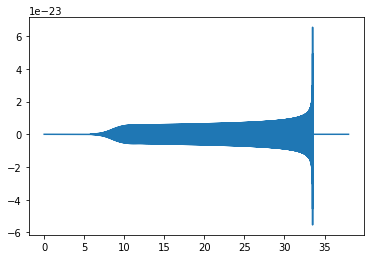

In [5]:
sample_rate=4096
t=np.arange(0,len(data)/sample_rate,1/sample_rate)
print(max(t))
plt.plot(t,data)
plt.show()

In [20]:
print(5<t)
print(t<10)

def twindow(t,h,t0,tl):
    ind=(t0<t)==(t<(t0+tl))
    return t[ind],h[ind]

twindow(t,data,5,.2)

[False False False ...  True  True  True]
[ True  True  True ... False False False]


(array([5.00024414, 5.00048828, 5.00073242, 5.00097656, 5.0012207 ,
        5.00146484, 5.00170898, 5.00195312, 5.00219727, 5.00244141,
        5.00268555, 5.00292969, 5.00317383, 5.00341797, 5.00366211,
        5.00390625, 5.00415039, 5.00439453, 5.00463867, 5.00488281,
        5.00512695, 5.00537109, 5.00561523, 5.00585938, 5.00610352,
        5.00634766, 5.0065918 , 5.00683594, 5.00708008, 5.00732422,
        5.00756836, 5.0078125 , 5.00805664, 5.00830078, 5.00854492,
        5.00878906, 5.0090332 , 5.00927734, 5.00952148, 5.00976562,
        5.01000977, 5.01025391, 5.01049805, 5.01074219, 5.01098633,
        5.01123047, 5.01147461, 5.01171875, 5.01196289, 5.01220703,
        5.01245117, 5.01269531, 5.01293945, 5.01318359, 5.01342773,
        5.01367188, 5.01391602, 5.01416016, 5.0144043 , 5.01464844,
        5.01489258, 5.01513672, 5.01538086, 5.015625  , 5.01586914,
        5.01611328, 5.01635742, 5.01660156, 5.0168457 , 5.01708984,
        5.01733398, 5.01757812, 5.01782227, 5.01

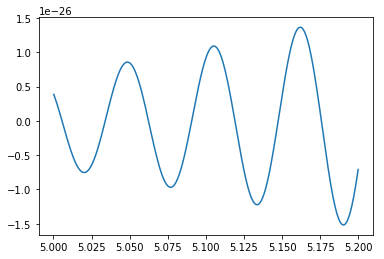

In [21]:
tw,hw=twindow(t,data,5,.2)

plt.plot(tw,hw)
plt.show()

/home/brandon/.conda/envs/machlearn/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


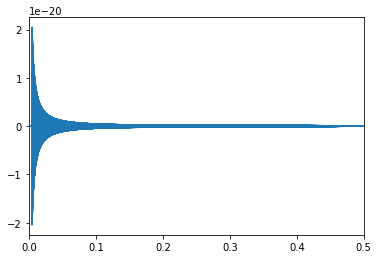

In [4]:
freq= np.fft.fftfreq(t.shape[-1])
fftdata=np.fft.fft(data)

plt.plot(freq,fftdata)
plt.xlim(0,max(freq))
plt.show()
